In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dados_limpos.csv", encoding='latin1', parse_dates=['DATA'])

In [6]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de imóveis,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,Despesa com pagamento de energia elétrica para...,2016-01-13,73.60,2016-01-13,0
1,2016,1,18,ACIR GURGACZ,Aluguel de imóveis,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,Pagamento de energia elétrica para o escritóri...,2016-01-18,206.84,2016-01-18,1
2,2016,1,1,ACIR GURGACZ,Aluguel de imóveis,GILBERTO PISELO DO NASCIMENTO,001/16,"Despesa com pagamento de aluguel, utilizado pa...",2016-04-01,6000.00,2016-04-01,1
3,2016,1,16,ACIR GURGACZ,Aluguel de imóveis,OI MÓVEL S.A.,661639001,despesa com pagamento de telefonia para o escr...,2016-01-16,407.48,2016-01-16,1
4,2016,1,1,ACIR GURGACZ,Aquisição de material,AGÊNCIA ESTADO S.A.,00608918,Aquisição de publicação virtual de conteúdo jo...,2016-06-01,550.00,2016-06-01,1


In [7]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
FORNECEDOR                   object
DOCUMENTO                    object
DETALHAMENTO                 object
DATA                 datetime64[ns]
VALOR_REEMBOLSADO           float64
DATE                         object
MAIOR_QUE_100                 int64
dtype: object

In [9]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,26691.0,26691.000000,26691.000000,26691.000000,26691.000000
mean,2016.0,6.470908,15.431419,947.484513,0.784085
std,0.0,3.257134,8.847378,2733.820037,0.411464
min,2016.0,1.000000,1.000000,0.010000,0.000000
25%,2016.0,4.000000,8.000000,124.000000,1.000000
50%,2016.0,6.000000,15.000000,324.790000,1.000000
75%,2016.0,9.000000,23.000000,956.865000,1.000000
max,2016.0,12.000000,31.000000,256980.000000,1.000000


In [10]:
df.loc[df['VALOR_REEMBOLSADO']>200000]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
4637,2016,12,22,DAVI ALCOLUMBRE,Divulgação,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,NaN,2017-03-22,256980.0,2017-03-22,1


In [14]:
df.loc[df['VALOR_REEMBOLSADO']== 0.01]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
6847,2016,3,22,FERNANDO BEZERRA COELHO,Passagens,GOL,NFPJ4Z,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",2016-03-22,0.01,2016-03-22,0
6848,2016,3,30,FERNANDO BEZERRA COELHO,Passagens,GOL,OEI85P,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",2016-03-30,0.01,2016-03-30,0
11278,2016,6,6,JORGE VIANA,Passagens,LATAM,3EY28M,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",2016-02-06,0.01,2016-02-06,0
11494,2016,12,17,JORGE VIANA,Passagens,GOL TRANSPORTES AÉREOS S/A,NCNMYL,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",2016-10-17,0.01,2016-10-17,0
18749,2016,6,21,PEDRO CHAVES DOS SANTOS FILHO,Passagens,Via Berrini Turismo e Eventos Ltda ME,FT00020270,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",2016-07-21,0.01,2016-07-21,0
23302,2016,3,31,TELMÁRIO MOTA,Passagens,CONTINENTAL TURISMO,BGNV5G,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",2016-03-31,0.01,2016-03-31,0


In [26]:
df.loc[(df['TIPO_DESPESA']== 'Divulgação') & (df['VALOR_REEMBOLSADO']>3000)]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
55,2016,4,26,ACIR GURGACZ,Divulgação,HRPP SERVIÇO DE PRODUÇÃO E IMP. DE MATERIAIS L...,5,Despesa com Divulgação da Atividade Parlamentar,2016-04-26,19800.00,2016-04-26,1
71,2016,5,31,ACIR GURGACZ,Divulgação,SS COMUNICAÇÃO VISUAL LTDA - ME,3987,Despesa com divulgação da atividade parlamentar,2016-05-31,16750.00,2016-05-31,1
137,2016,9,9,ACIR GURGACZ,Divulgação,HRPP SERVIÇO DE PRODUÇÃO E IMP. DE MATERIAIS L...,12,Despesa com Divulgação da Atividade Parlamentar,2016-06-09,15790.00,2016-06-09,1
242,2016,5,24,AÉCIO NEVES,Divulgação,GRAFFO - AGENCIA DE NOTICIAS INFOGRAFICAS LTDA...,2016/246,Divulgação da atividade parlamentar.,2016-05-24,4700.00,2016-05-24,1
431,2016,12,22,AÉCIO NEVES,Divulgação,GRAFFO - AGENCIA DE NOTICIAS INFOGRAFICAS LTDA...,2016/548,Divulgação da atividade parlamentar.,2016-12-22,3850.00,2016-12-22,1
1429,2016,1,1,ÂNGELA PORTELA,Divulgação,FORBRAS RORAIMA LTDA,11302,NaN,2016-04-01,4200.00,2016-04-01,1
1451,2016,3,29,ÂNGELA PORTELA,Divulgação,AUTO POSTO CANARINHO,4761,NaN,2016-03-29,4115.60,2016-03-29,1
1493,2016,6,6,ÂNGELA PORTELA,Divulgação,FORBRAS RORAIMA LTDA,12587,NaN,2016-01-06,4400.00,2016-01-06,1
1494,2016,6,16,ÂNGELA PORTELA,Divulgação,FORBRAS RORAIMA LTDA,12737,NaN,2016-06-16,16500.00,2016-06-16,1
1514,2016,7,18,ÂNGELA PORTELA,Divulgação,RADIO E TV TROPICAL,4243,NaN,2016-07-18,5224.00,2016-07-18,1


In [27]:
gastos_de_senadores = df.groupby('SENADOR')

In [29]:
gastos_de_senadores = gastos_de_senadores['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

In [30]:
top_10_senadores = gastos_de_senadores.head(10)
top_10_senadores

SENADOR
DAVI ALCOLUMBRE       510076.07
JOÃO CAPIBERIBE       502997.57
TELMÁRIO MOTA         488678.92
PAULO ROCHA           485114.40
VANESSA GRAZZIOTIN    477079.76
RANDOLFE RODRIGUES    471847.84
SÉRGIO PETECÃO        463456.45
GLADSON CAMELI        459977.83
ROMERO JUCÁ           446448.98
CIRO NOGUEIRA         440047.81
Name: VALOR_REEMBOLSADO, dtype: float64

In [42]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0, 0.5, 'Valor total de reembolso')

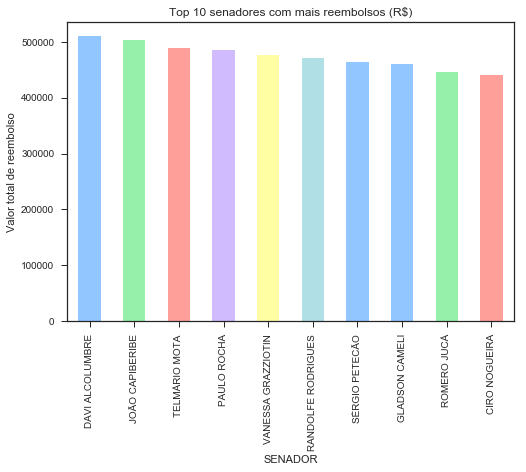

In [49]:
plt.style.use( 'seaborn-notebook',)
top_10_senadores.plot(kind='bar')
plt.title('Top 10 senadores com mais reembolsos (R$)')
plt.ylabel('Valor total de reembolso')

In [53]:
top_10_senadores.index

Index(['DAVI ALCOLUMBRE', 'JOÃO CAPIBERIBE', 'TELMÁRIO MOTA', 'PAULO ROCHA',
       'VANESSA GRAZZIOTIN', 'RANDOLFE RODRIGUES', 'SÉRGIO PETECÃO',
       'GLADSON CAMELI', 'ROMERO JUCÁ', 'CIRO NOGUEIRA'],
      dtype='object', name='SENADOR')

In [61]:
gastos_top_10 = df.loc[df['SENADOR'].isin(top_10_senadores.index)&(df['VALOR_REEMBOLSADO']<70000)]

In [62]:
gastos_top_10

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
3190,2016,1,20,CIRO NOGUEIRA,Contratações,AI Assessoria de Imprensa Com e Marketing Ltda,815,"Assessoria de imprensa, elaboração de notícias...",2016-01-20,7000.00,2016-01-20,1
3191,2016,1,27,CIRO NOGUEIRA,Logística,Baru Restaurante Ltda,057015,despesas com alimentação,2016-01-27,866.58,2016-01-27,1
3192,2016,1,28,CIRO NOGUEIRA,Logística,Deck Rest e Pizzaria Ltda EPP,070797,Despesas com alimentação,2016-01-28,93.70,2016-01-28,0
3193,2016,1,30,CIRO NOGUEIRA,Logística,Holanda Costa & Cia Ltda MEE,011165,despesa com alimentação,2016-01-30,251.42,2016-01-30,1
3194,2016,1,29,CIRO NOGUEIRA,Logística,J W Saraiva e Cia Ltda,3204,Combustível para aviação,2016-01-29,1440.00,2016-01-29,1
3195,2016,1,1,CIRO NOGUEIRA,Logística,JWS Serviços e Comércio de Combustível Ltda,537,Combustível para aviação,2016-05-01,2987.40,2016-05-01,1
3196,2016,1,13,CIRO NOGUEIRA,Passagens,GOL,FY8M2L,"Companhia Aérea: GOL, Localizador: FY8M2L. Pas...",2016-01-13,1285.45,2016-01-13,1
3197,2016,1,1,CIRO NOGUEIRA,Passagens,TAM,8AUQUN,"Companhia Aérea: TAM, Localizador: 8AUQUN. Pas...",2016-04-01,1356.83,2016-04-01,1
3198,2016,1,1,CIRO NOGUEIRA,Passagens,TAM,8CTNAK,"Companhia Aérea: TAM, Localizador: 8CTNAK. Pas...",2016-05-01,1229.35,2016-05-01,1
3199,2016,2,22,CIRO NOGUEIRA,Contratações,AI Assessoria de Imprensa Com e Marketing Ltda,823,"Assessoria de imprensa, elaboração de notícias...",2016-02-22,7000.00,2016-02-22,1


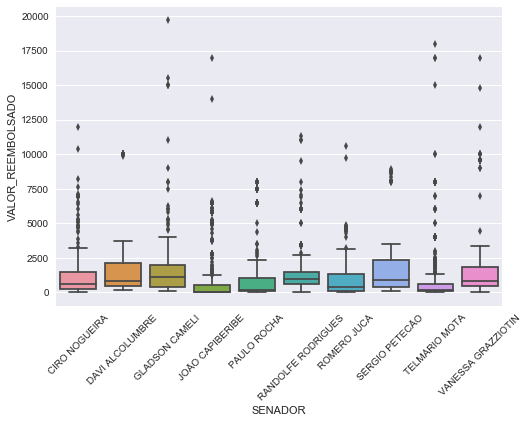

In [66]:
plt.style.use('seaborn')
sns.boxplot(x=gastos_top_10['SENADOR'],y=gastos_top_10['VALOR_REEMBOLSADO'])
plt.xticks(rotation=45)
plt.show()

In [67]:
mapa_de_calor = df

In [74]:
mapa_de_calor['DATA']= df['DATA'].dt.strftime('%Y-%m')

In [75]:
mapa_de_calor

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,FORNECEDOR,DOCUMENTO,DETALHAMENTO,DATA,VALOR_REEMBOLSADO,DATE,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de imóveis,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,Despesa com pagamento de energia elétrica para...,2016-01,73.60,2016-01-13,0
1,2016,1,18,ACIR GURGACZ,Aluguel de imóveis,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,Pagamento de energia elétrica para o escritóri...,2016-01,206.84,2016-01-18,1
2,2016,1,1,ACIR GURGACZ,Aluguel de imóveis,GILBERTO PISELO DO NASCIMENTO,001/16,"Despesa com pagamento de aluguel, utilizado pa...",2016-04,6000.00,2016-04-01,1
3,2016,1,16,ACIR GURGACZ,Aluguel de imóveis,OI MÓVEL S.A.,661639001,despesa com pagamento de telefonia para o escr...,2016-01,407.48,2016-01-16,1
4,2016,1,1,ACIR GURGACZ,Aquisição de material,AGÊNCIA ESTADO S.A.,00608918,Aquisição de publicação virtual de conteúdo jo...,2016-06,550.00,2016-06-01,1
5,2016,1,13,ACIR GURGACZ,Contratações,RONDOINFO DIST. DE PROD. DE INFORMATICA LTDA EPP,312,NaN,2016-01,40.00,2016-01-13,0
6,2016,1,19,ACIR GURGACZ,Logística,PETROBRAS DISTRIBUIDORA,000570293,Despesa com aquisição de combustível para abas...,2016-01,1218.76,2016-01-19,1
7,2016,1,19,ACIR GURGACZ,Logística,PETROBRAS DISTRIBUIDORA,000570326,Despesa com aquisição de combustível para abas...,2016-01,1761.34,2016-01-19,1
8,2016,1,21,ACIR GURGACZ,Logística,PETROBRAS DISTRIBUIDORA,000570688,Despesa com aquisição de combustível para abas...,2016-01,451.18,2016-01-21,1
9,2016,1,21,ACIR GURGACZ,Logística,PETROBRAS DISTRIBUIDORA,000570743,Despesa com aquisição de combustível para abas...,2016-01,923.30,2016-01-21,1


In [77]:
df.pivot= mapa_de_calor.pivot_table(index='DATA',columns='TIPO_DESPESA',values='VALOR_REEMBOLSADO',aggfunc=np.sum, fill_value=0)

df.pivot.head()

TIPO_DESPESA,Aluguel de imóveis,Aquisição de material,Contratações,Divulgação,Logística,Passagens,Segurança
DATA,,,,,,,
1977-10,0.0,0.0,0.0,0.0,152.51,0.00,0.0
1986-03,0.0,0.0,0.0,0.0,139.16,0.00,0.0
2012-02,162.4,0.0,0.0,0.0,0.00,0.00,0.0
2013-09,0.0,0.0,0.0,0.0,675.00,0.00,0.0
2014-01,0.0,0.0,0.0,0.0,0.00,374.83,0.0


In [78]:
df.pivot= df.pivot.loc['2016-01':'2016-12']
df.pivot

TIPO_DESPESA,Aluguel de imóveis,Aquisição de material,Contratações,Divulgação,Logística,Passagens,Segurança
DATA,,,,,,,
2016-01,681720.72,130287.53,519205.27,419496.30,878387.57,423176.74,284426.09
2016-02,355621.91,103718.82,286143.29,252818.74,592530.48,487826.19,21832.40
2016-03,361367.60,94986.41,255112.80,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,93684.00,243225.69,224044.85,462978.26,549032.37,21978.24
2016-05,765999.20,80266.83,275629.88,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,90153.46,219292.74,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,67689.75,136238.66,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,78291.64,202764.55,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,78875.75,107722.85,200740.90,473085.66,469299.83,9194.48


Text(0.5, 1.0, 'Gastos por mês agrupados por mês ano')

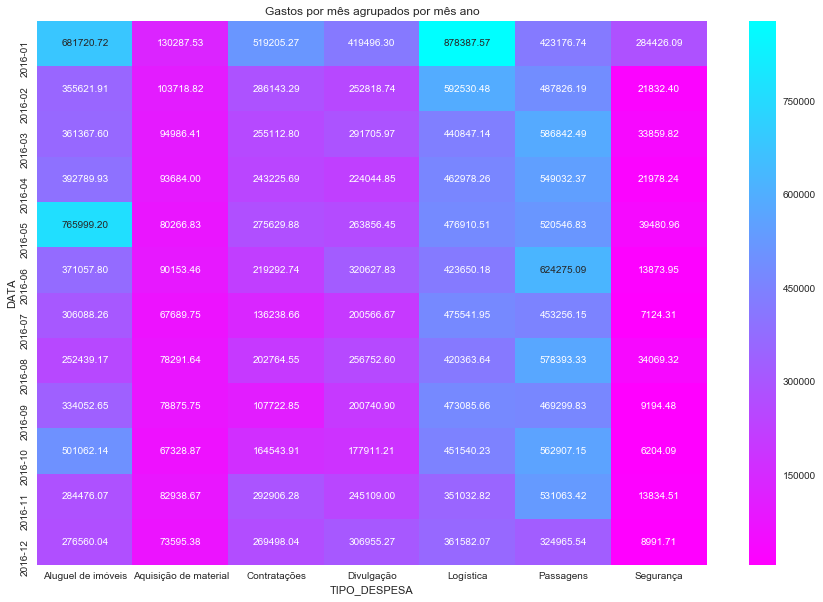

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df.pivot,annot=True, fmt='.2f',cmap='cool_r')
plt.title('Gastos por mês agrupados por mês ano')